In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


sns.set()

#-------------------- 차트 관련 속성 (한글처리, 그리드) -----------
plt.rcParams['font.family']= 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

#-------------------- 주피터 , 출력결과 넓이 늘리기 ---------------
# from IPython.core.display import display, HTML
from IPython.display import display, HTML

display(HTML("<style>.container{width:100% !important;}</style>"))
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('max_colwidth', None)

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
# 모델 평가 import

from sklearn.metrics import confusion_matrix

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score,  recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve

from sklearn.metrics import roc_auc_score, roc_curve, plot_roc_curve
from sklearn.preprocessing import Binarizer
from sklearn.model_selection import cross_val_score, cross_validate

In [3]:
from sklearn.linear_model import LogisticRegression

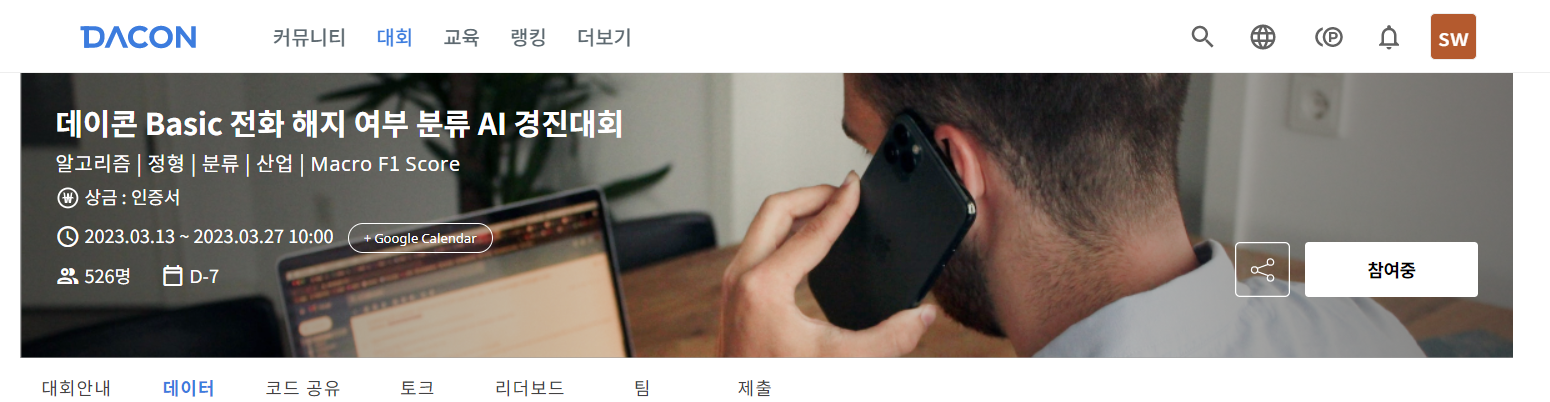

<pre>

30200개의 데이터
ID : 샘플 별 고유 ID
가입일 : 서비스에 가입한 일수
음성사서함이용 : 음성사서함 이용 건수
주간통화시간 : 8시 ~ 16시까지의 통화 시간
주간통화횟수 : 8시 ~ 16시까지의 통화 횟수
주간통화요금 : 8시 ~ 16시까지의 통화 요금
저녁통화시간 : 16시 ~ 0시까지의 통화 시간
저녁통화횟수 : 16시 ~ 0시까지의 통화 횟수
저녁통화요금 : 16시 ~ 0시까지의 통화 요금
밤통화시간 : 0시 ~ 8시까지의 통화 시간
밤통화횟수 : 0시 ~ 8시까지의 통화 횟수
밤통화요금 : 0시 ~ 8시까지의 통화 요금
상담전화건수 : 고객센터에 전화를 건 횟수
전화해지여부 : 0(서비스 유지)/ 1(서비스 해지)

# Road

In [4]:
train = pd.read_csv('./train.csv')
train


,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,TRAIN_00000,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,TRAIN_00001,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,TRAIN_00002,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,TRAIN_00003,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,TRAIN_00004,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30195,TRAIN_30195,263,80,289.6,201,21.8,280.5,323,29.88,208.0,66,9.28,2,0
30196,TRAIN_30196,283,81,210.7,280,90.5,284.1,202,32.80,287.8,203,6.28,2,0
30197,TRAIN_30197,24,0,222.4,33,22.1,233.9,32,22.22,293.6,95,4.22,2,0
30198,TRAIN_30198,63,1,262.4,202,29.6,280.6,282,28.88,280.9,207,20.88,2,1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30200 entries, 0 to 30199
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   ID       30200 non-null  object 
 1   가입일      30200 non-null  int64  
 2   음성사서함이용  30200 non-null  int64  
 3   주간통화시간   30200 non-null  float64
 4   주간통화횟수   30200 non-null  int64  
 5   주간통화요금   30200 non-null  float64
 6   저녁통화시간   30200 non-null  float64
 7   저녁통화횟수   30200 non-null  int64  
 8   저녁통화요금   30200 non-null  float64
 9   밤통화시간    30200 non-null  float64
 10  밤통화횟수    30200 non-null  int64  
 11  밤통화요금    30200 non-null  float64
 12  상담전화건수   30200 non-null  int64  
 13  전화해지여부   30200 non-null  int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 3.2+ MB


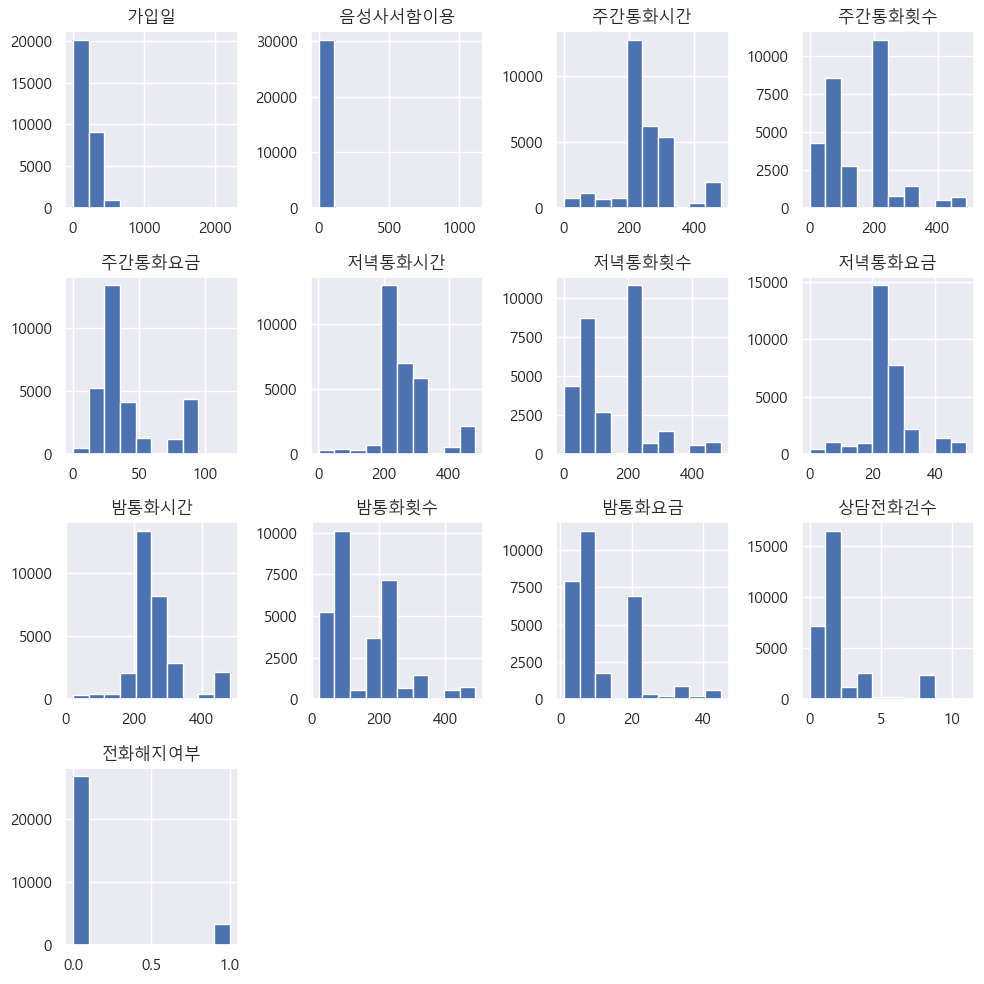

In [6]:
train.hist(figsize=(10,10))
plt.tight_layout()
plt.show()

In [7]:
# sns.pairplot(data=df , hue='전화해지여부')
# plt.show()

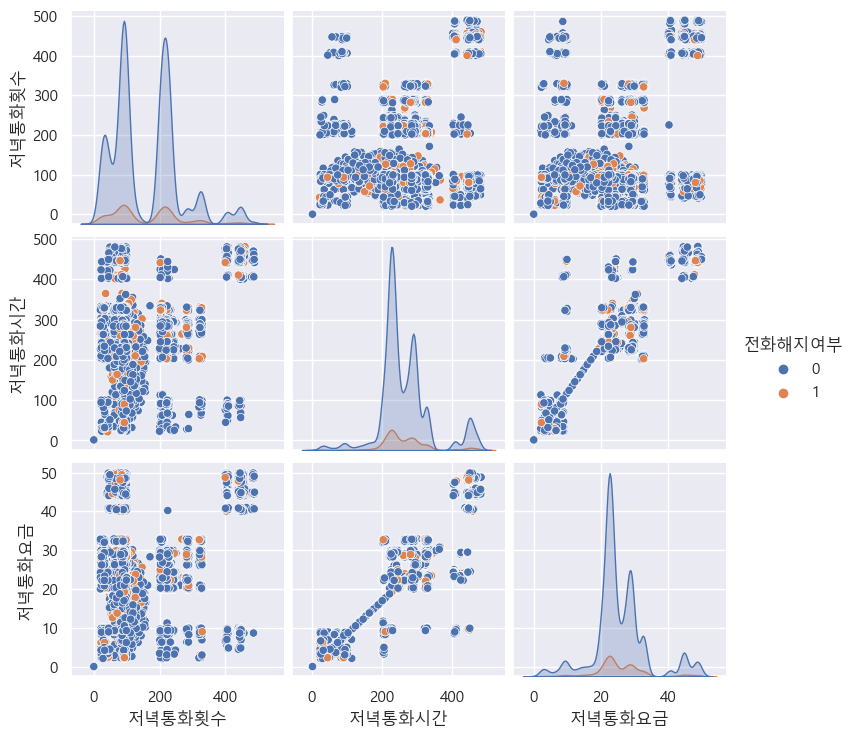

In [8]:
dfcp = train[['저녁통화횟수','저녁통화시간','저녁통화요금','전화해지여부']].copy()
sns.pairplot(data=dfcp, hue='전화해지여부')
plt.show()

In [9]:
len(train[train['전화해지여부']==1])

3318

In [10]:
df1 = train[train['전화해지여부']==1]
df1.head()

,ID,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
9,TRAIN_00009,223,0,63.2,223,21.2,23.4,89,6.88,228.6,100,2.29,2,1
61,TRAIN_00061,488,0,444.9,489,45.1,449.1,444,49.44,446.0,409,8.48,4,1
69,TRAIN_00069,98,0,269.7,220,29.8,288.4,220,29.86,230.7,63,8.02,2,1
70,TRAIN_00070,222,0,220.4,69,24.0,230.8,223,29.33,238.0,222,6.22,2,1
94,TRAIN_00094,99,1,236.5,22,24.4,223.9,204,23.23,233.8,23,20.32,3,1


# 상담전화건수 2 : 해지 고객의 절반

In [11]:
df1[['전화해지여부','상담전화건수']].value_counts()

전화해지여부  상담전화건수
1       2         1678
        0          607
        8          313
        4          252
        3          194
        6          112
        1           80
        5           58
        9           15
        7            7
        11           2
dtype: int64

In [12]:
# dfcp.drop('ID',axis=1,inplace=True)

In [13]:
# train

In [14]:
train.drop('ID',axis=1,inplace=True)

In [15]:
from imblearn.over_sampling import SMOTE

y = train['전화해지여부']
X = train.drop(['전화해지여부'], axis=1)

X_s, y_s = SMOTE(sampling_strategy='auto', random_state=21).fit_resample(X,y)
print(  len(X_s), len(y_s) )

y_s.value_counts()

53764 53764


0    26882
1    26882
Name: 전화해지여부, dtype: int64

In [16]:
# train['ID'].unique()

# 오버 샘플링

In [17]:
tro = pd.concat([X_s,y_s], axis = 1, ignore_index = False)
tro.head()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
0,329,0,99.2,93,27.3,268.8,68,28.92,262.9,328,32.89,2,0
1,2,80,323.9,323,83.7,269.4,326,32.09,322.8,209,32.32,2,0
2,93,28,282.4,323,34.2,207.0,322,32.82,280.8,328,8.28,0,0
3,223,1,221.4,223,25.1,233.0,61,23.90,203.8,234,9.36,0,0
4,222,0,96.3,222,28.7,223.9,69,28.08,263.1,223,2.80,8,0


In [18]:
tro.describe()

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000,53764.000000
mean,160.209006,9.572483,253.255146,160.193308,38.544811,263.109784,157.825366,25.412191,262.758280,156.936054,12.203225,2.326055,0.500000
std,119.627542,21.585946,82.136149,100.305176,20.946449,70.416006,100.981340,7.691104,70.192249,101.330327,8.944616,2.014162,0.500005
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.000000
25%,64.000000,0.000000,223.500000,88.000000,24.414948,223.900000,87.000000,22.220000,223.834813,85.000000,6.220000,1.000000,0.000000
50%,125.000000,1.000000,239.900000,124.000000,30.170746,243.500000,111.000000,23.590371,243.099647,110.000000,9.220000,2.000000,0.500000
75%,228.000000,1.000000,289.900000,223.000000,44.340252,290.100000,222.000000,28.800000,290.278483,222.000000,20.240000,2.000000,1.000000
max,2212.000000,1112.000000,481.900000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,1.000000


<AxesSubplot: xlabel='상담전화건수', ylabel='저녁통화시간'>

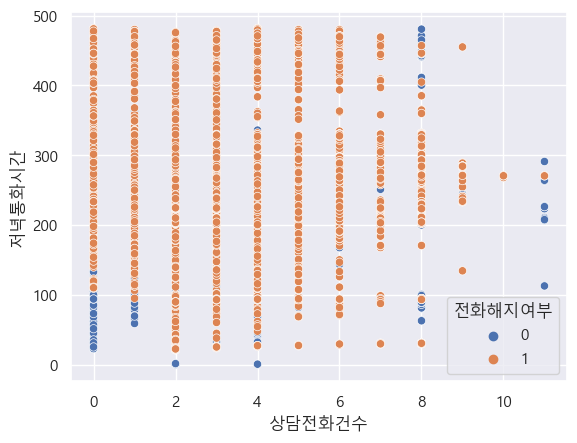

In [19]:
sns.scatterplot(x="상담전화건수", y="저녁통화시간",
                hue="전화해지여부",data=tro)

In [20]:
tro['상담전화건수'].nunique()

12

In [21]:
tro['상담전화건수'].value_counts()

2     27070
0     10318
4      4241
1      3209
8      3175
3      2965
6      1121
5      1067
7       521
9        49
11       21
10        7
Name: 상담전화건수, dtype: int64

<AxesSubplot: xlabel='상담전화건수,전화해지여부'>

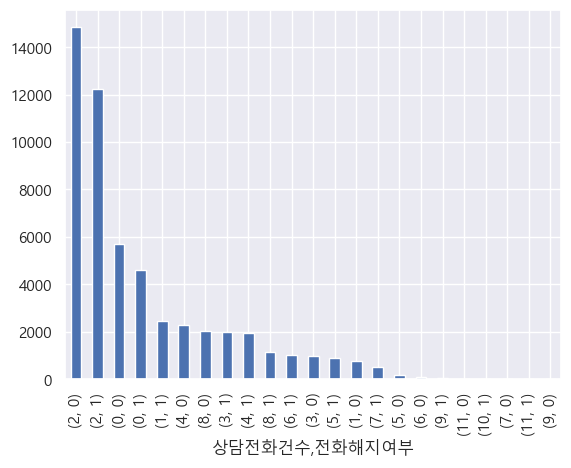

In [22]:
tro[['상담전화건수','전화해지여부']].value_counts().plot(kind='bar')

In [23]:
tr = train.copy()

# time 과 amount 살펴보기

<pre>

0, 1 describe 값 비교하면서 차이 많은 피쳐 찾아보기

* mean 값 유의미한 피쳐들

- 저녁통화시간
- 저녁통화횟수
- 저녁통화요금

* 언더샘플링, 오버샘플링

# EDA

# describe 비교

In [24]:
t0 = tro[tro['전화해지여부']==0]
t1 = tro[tro['전화해지여부']==1]

In [25]:
t0d = t0.describe()
t0d

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.0
mean,159.441857,12.587159,249.674619,158.784131,41.669660,263.251451,158.628078,25.389364,263.512730,157.158954,12.026648,2.246931,0.0
std,124.193729,25.566918,84.830161,101.747847,23.536478,74.741785,102.359429,8.223539,74.529181,101.785060,9.432624,2.018357,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,20.800000,20.000000,1.040000,0.000000,0.0
25%,63.000000,0.000000,222.500000,88.000000,24.500000,223.700000,87.000000,22.220000,223.700000,87.000000,4.480000,2.000000,0.0
50%,116.000000,1.000000,233.600000,115.000000,31.200000,242.950000,112.000000,23.300000,242.700000,107.000000,9.020000,2.000000,0.0
75%,228.000000,23.000000,289.400000,223.000000,46.200000,290.400000,223.000000,28.820000,290.500000,222.000000,20.290000,2.000000,0.0
max,2212.000000,1112.000000,481.200000,489.000000,118.600000,481.600000,489.000000,49.980000,481.800000,490.000000,44.980000,11.000000,0.0


In [26]:
t1d = t1.describe()
t1d

,가입일,음성사서함이용,주간통화시간,주간통화횟수,주간통화요금,저녁통화시간,저녁통화횟수,저녁통화요금,밤통화시간,밤통화횟수,밤통화요금,상담전화건수,전화해지여부
count,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.0
mean,160.976155,6.557808,256.835672,161.602485,35.419963,262.968118,157.022655,25.435018,262.003831,156.713154,12.379803,2.405178,1.0
std,114.877198,16.126964,79.190577,98.823251,17.436396,65.807582,99.579616,7.119040,65.561800,100.874945,8.424876,2.006878,0.0
min,1.000000,0.000000,0.100000,0.000000,0.100000,21.100000,20.000000,2.290000,22.600000,20.000000,2.020000,0.000000,1.0
25%,68.000000,0.000000,224.846025,88.000000,24.359197,224.191325,86.000000,22.230000,224.034359,84.000000,6.680000,1.000000,1.0
50%,133.000000,0.000000,248.860784,143.000000,29.541332,245.003646,110.000000,23.836334,243.735288,112.000000,9.299062,2.000000,1.0
75%,228.000000,1.000000,290.887275,223.000000,39.448841,289.763540,222.000000,28.628431,289.960564,222.000000,20.090000,3.000000,1.0
max,2012.000000,117.000000,481.900000,489.000000,117.800000,481.400000,489.000000,49.890000,481.000000,488.000000,44.890000,11.000000,1.0


In [27]:
t1d.compare(t0d)

가입일                  음성사서함이용                   주간통화시간  \
             self        other        self        other        self   
mean   160.976155   159.441857    6.557808    12.587159  256.835672   
std    114.877198   124.193729   16.126964    25.566918   79.190577   
min           NaN          NaN         NaN          NaN    0.100000   
25%     68.000000    63.000000         NaN          NaN  224.846025   
50%    133.000000   116.000000    0.000000     1.000000  248.860784   
75%           NaN          NaN    1.000000    23.000000  290.887275   
max   2012.000000  2212.000000  117.000000  1112.000000  481.900000   

                      주간통화횟수                  주간통화요금                  저녁통화시간  \
           other        self       other        self       other        self   
mean  249.674619  161.602485  158.784131   35.419963   41.669660  262.968118   
std    84.830161   98.823251  101.747847   17.436396   23.536478   65.807582   
min     0.000000         NaN         NaN    0.100000    0.000000   21.100000   
25%   222.500000         NaN         NaN   24.359197   24.500000  224.191325   
50%   233.600000  143.000000  115.000000   29.541332   31.200000  245.003646   
75%   289.400000         NaN         NaN   39.448841   46.200000  289.763540   
max   481.200000         NaN         NaN  117.800000  118.600000  481.400000   

                      저녁통화횟수                 저녁통화요금                  밤통화시간  \
           other        self       other       self      other        self   
mean  263.251451  157.022655  158.628078  25.435018  25.389364  262.003831   
std    74.741785   99.579616  102.359429   7.119040   8.223539   65.561800   
min     0.100000   20.000000    0.000000   2.290000   0.000000   22.600000   
25%   223.700000   86.000000   87.000000  22.230000  22.220000  224.034359   
50%   242.950000  110.000000  112.000000  23.836334  23.300000  243.735288   
75%   290.400000  222.000000  223.000000  28.628431  28.820000  289.960564   
max   481.600000         NaN         NaN  49.890000  49.980000  481.000000   

                       밤통화횟수                  밤통화요금               상담전화건수  \
           other        self       other       self      other      self   
mean  263.512730  156.713154  157.158954  12.379803  12.026648  2.405178   
std    74.529181  100.874945  101.785060   8.424876   9.432624  2.006878   
min    20.800000         NaN         NaN   2.020000   1.040000       NaN   
25%   223.700000   84.000000   87.000000   6.680000   4.480000  1.000000   
50%   242.700000  112.000000  107.000000   9.299062   9.020000       NaN   
75%   290.500000         NaN         NaN  20.090000  20.290000  3.000000   
max   481.800000  488.000000  490.000000  44.890000  44.980000       NaN   

               전화해지여부        
         other   self other  
mean  2.246931    1.0   0.0  
std   2.018357    NaN   NaN  
min        NaN    1.0   0.0  
25%   2.000000    1.0   0.0  
50%        NaN    1.0   0.0  
75%   2.000000    1.0   0.0  
max        NaN    1.0   0.0

<pre>

* 음성사서함 이용
- max값 차이
- std 차이

* 주간통화시간
- std 1 > 0

* 주간통화 횟수
- 50% 1 > 0 (30)

* 저녁통화시간
- min 1 : 21 / 0 : 0.1

* 저녁통화시간
- min 1 : 20 / 0 : 0.0
- 

* 저녁통화횟수
- min 1 : 20 / 0 : 0.0

* 밤통화시간
- 1 > 0

* 대체로 저녁, 밤 시간대 이용이 적은 사람이 1 해지를 많이 했다.

# 가입일 대비 비교 데이터

In [28]:
tro.columns

Index(['가입일', '음성사서함이용', '주간통화시간', '주간통화횟수', '주간통화요금', '저녁통화시간', '저녁통화횟수',
       '저녁통화요금', '밤통화시간', '밤통화횟수', '밤통화요금', '상담전화건수', '전화해지여부'],
      dtype='object')

In [34]:
tro.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53764 entries, 0 to 53763
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   가입일      53764 non-null  int64  
 1   음성사서함이용  53764 non-null  int64  
 2   주간통화시간   53764 non-null  float64
 3   주간통화횟수   53764 non-null  int64  
 4   주간통화요금   53764 non-null  float64
 5   저녁통화시간   53764 non-null  float64
 6   저녁통화횟수   53764 non-null  int64  
 7   저녁통화요금   53764 non-null  float64
 8   밤통화시간    53764 non-null  float64
 9   밤통화횟수    53764 non-null  int64  
 10  밤통화요금    53764 non-null  float64
 11  상담전화건수   53764 non-null  int64  
 12  전화해지여부   53764 non-null  int64  
dtypes: float64(6), int64(7)
memory usage: 5.3 MB


In [29]:
# tro2 = tro['저녁통화시간'] / tro['가입일']
가입일대비 = pd.DataFrame(tro['가입일'], columns = ['가입일'])

In [30]:
가입일대비['음성사서함이용/가입일'] =  tro['음성사서함이용'] / tro['가입일']
가입일대비['주간통화시간/가입일'] =  tro['주간통화시간'] / tro['가입일']
가입일대비['주간통화횟수/가입일'] =  tro['주간통화횟수'] / tro['가입일']
가입일대비['주간통화요금/가입일'] =  tro['주간통화요금'] / tro['가입일']
가입일대비['저녁통화시간/가입일'] =  tro['저녁통화시간'] / tro['가입일']
가입일대비['저녁통화횟수/가입일'] =  tro['저녁통화횟수'] / tro['가입일']
가입일대비['저녁통화요금/가입일'] =  tro['저녁통화요금'] / tro['가입일']
가입일대비['밤통화시간/가입일'] =  tro['밤통화시간'] / tro['가입일']
가입일대비['밤통화횟수/가입일'] =  tro['밤통화횟수'] / tro['가입일']
가입일대비['밤통화요금/가입일'] =  tro['밤통화요금'] / tro['가입일']
가입일대비['상담전화건수/가입일'] =  tro['상담전화건수'] / tro['가입일']



가입일대비['전화해지여부'] = tro['전화해지여부']

가입일대비

,가입일,음성사서함이용/가입일,주간통화시간/가입일,주간통화횟수/가입일,주간통화요금/가입일,저녁통화시간/가입일,저녁통화횟수/가입일,저녁통화요금/가입일,밤통화시간/가입일,밤통화횟수/가입일,밤통화요금/가입일,상담전화건수/가입일,전화해지여부
0,329,0.000000,0.301520,0.282675,0.082979,0.817021,0.206687,0.087903,0.799088,0.996960,0.099970,0.006079,0
1,2,40.000000,161.950000,161.500000,41.850000,134.700000,163.000000,16.045000,161.400000,104.500000,16.160000,1.000000,0
2,93,0.301075,3.036559,3.473118,0.367742,2.225806,3.462366,0.352903,3.019355,3.526882,0.089032,0.000000,0
3,223,0.004484,0.992825,1.000000,0.112556,1.044843,0.273543,0.107175,0.913901,1.049327,0.041973,0.000000,0
4,222,0.000000,0.433784,1.000000,0.129279,1.008559,0.310811,0.126486,1.185135,1.004505,0.012613,0.036036,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
53759,73,0.013699,3.528143,1.438356,0.613751,2.381507,1.684932,0.201206,3.218612,1.506849,0.144333,0.000000,1
53760,23,0.043478,9.743601,9.565217,1.005571,12.587198,3.173913,1.181973,10.000669,1.782609,0.793137,0.000000,1
53761,223,0.121076,1.042737,0.928251,0.128560,1.067523,0.278027,0.114967,1.000275,0.125561,0.081075,0.013453,1
53762,63,0.079365,4.761555,0.444444,0.495527,4.267727,3.206349,0.496171,5.166185,5.206349,0.123155,0.095238,1


In [36]:
aa1 = 가입일대비[가입일대비['전화해지여부']==1].describe()

In [37]:
aa0 = 가입일대비[가입일대비['전화해지여부']==0].describe()

In [39]:
aa1

,가입일,음성사서함이용/가입일,주간통화시간/가입일,주간통화횟수/가입일,주간통화요금/가입일,저녁통화시간/가입일,저녁통화횟수/가입일,저녁통화요금/가입일,밤통화시간/가입일,밤통화횟수/가입일,밤통화요금/가입일,상담전화건수/가입일,전화해지여부
count,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.000000,26882.0
mean,160.976155,0.071126,3.404063,2.083120,0.475420,3.526776,2.049278,0.339781,3.501813,2.091902,0.165815,0.032915,1.0
std,114.877198,0.264962,6.546491,4.091820,1.203410,6.548728,4.171354,0.617519,6.705135,4.567647,0.259791,0.115181,0.0
min,1.000000,0.000000,0.001020,0.000000,0.001010,0.080228,0.075862,0.006982,0.098765,0.055169,0.001049,0.000000,1.0
25%,68.000000,0.000000,1.015653,0.628049,0.116293,1.020692,0.431925,0.100833,1.026010,0.433790,0.035643,0.006944,1.0
50%,133.000000,0.000000,1.376661,1.000000,0.264355,1.602909,1.000000,0.144400,1.479597,0.989247,0.088803,0.012422,1.0
75%,228.000000,0.018868,3.810351,2.348192,0.572936,4.046690,2.350000,0.385674,3.996403,2.326531,0.168501,0.033333,1.0
max,2012.000000,4.150000,183.200000,107.000000,41.150000,145.350000,107.000000,16.410000,154.000000,165.000000,6.850000,5.000000,1.0


In [38]:
aa1.compare(aa0)


가입일              음성사서함이용/가입일             주간통화시간/가입일              \
             self        other        self      other        self       other   
mean   160.976155   159.441857    0.071126   0.186048    3.404063    3.620030   
std    114.877198   124.193729    0.264962   0.942975    6.546491    7.239084   
min           NaN          NaN         NaN        NaN    0.001020    0.000000   
25%     68.000000    63.000000         NaN        NaN    1.015653    1.005830   
50%    133.000000   116.000000    0.000000   0.004785    1.376661    1.398603   
75%           NaN          NaN    0.018868   0.102679    3.810351    4.233871   
max   2012.000000  2212.000000    4.150000  40.500000  183.200000  165.350000   

      주간통화횟수/가입일             주간통화요금/가입일             저녁통화시간/가입일              \
            self       other       self      other        self       other   
mean    2.083120    2.284388   0.475420   0.607450    3.526776    3.822034   
std     4.091820    5.233217   1.203410   1.480058    6.548728    7.564081   
min          NaN         NaN   0.001010   0.000000    0.080228    0.001075   
25%     0.628049    0.500676   0.116293   0.126921    1.020692    1.017492   
50%          NaN         NaN   0.264355   0.296791    1.602909    1.622716   
75%     2.348192    2.397849   0.572936   0.721212    4.046690    4.669924   
max   107.000000  164.000000  41.150000  45.350000  145.350000  161.900000   

      저녁통화횟수/가입일             저녁통화요금/가입일              밤통화시간/가입일              \
            self       other       self      other        self       other   
mean    2.049278    2.231800   0.339781   0.364409    3.501813    3.757223   
std     4.171354    4.695088   0.617519   0.689925    6.705135    7.139257   
min     0.075862    0.000000   0.006982   0.000000    0.098765    0.085321   
25%     0.431925    0.477833   0.100833   0.100270    1.026010    1.017999   
50%          NaN         NaN   0.144400   0.143654    1.479597    1.594581   
75%     2.350000    2.397849   0.385674   0.452531    3.996403    4.585181   
max   107.000000  163.000000  16.410000  16.445000  154.000000  219.500000   

       밤통화횟수/가입일             밤통화요금/가입일            상담전화건수/가입일           전화해지여부  \
            self       other      self      other       self     other   self   
mean    2.091902    2.226276  0.165815   0.174187   0.032915  0.032399    1.0   
std     4.567647    4.887058  0.259791   0.436327   0.115181  0.085318    NaN   
min     0.055169    0.043419  0.001049   0.001900        NaN       NaN    1.0   
25%     0.433790    0.462687  0.035643   0.032218   0.006944  0.006897    1.0   
50%     0.989247    1.000000  0.088803   0.089469   0.012422  0.009852    1.0   
75%     2.326531    2.402174  0.168501   0.146984   0.033333  0.035088    1.0   
max   165.000000  160.500000  6.850000  16.160000   5.000000  4.000000    1.0   

            
     other  
mean   0.0  
std    NaN  
min    0.0  
25%    0.0  
50%    0.0  
75%    0.0  
max    0.0

<AxesSubplot: >

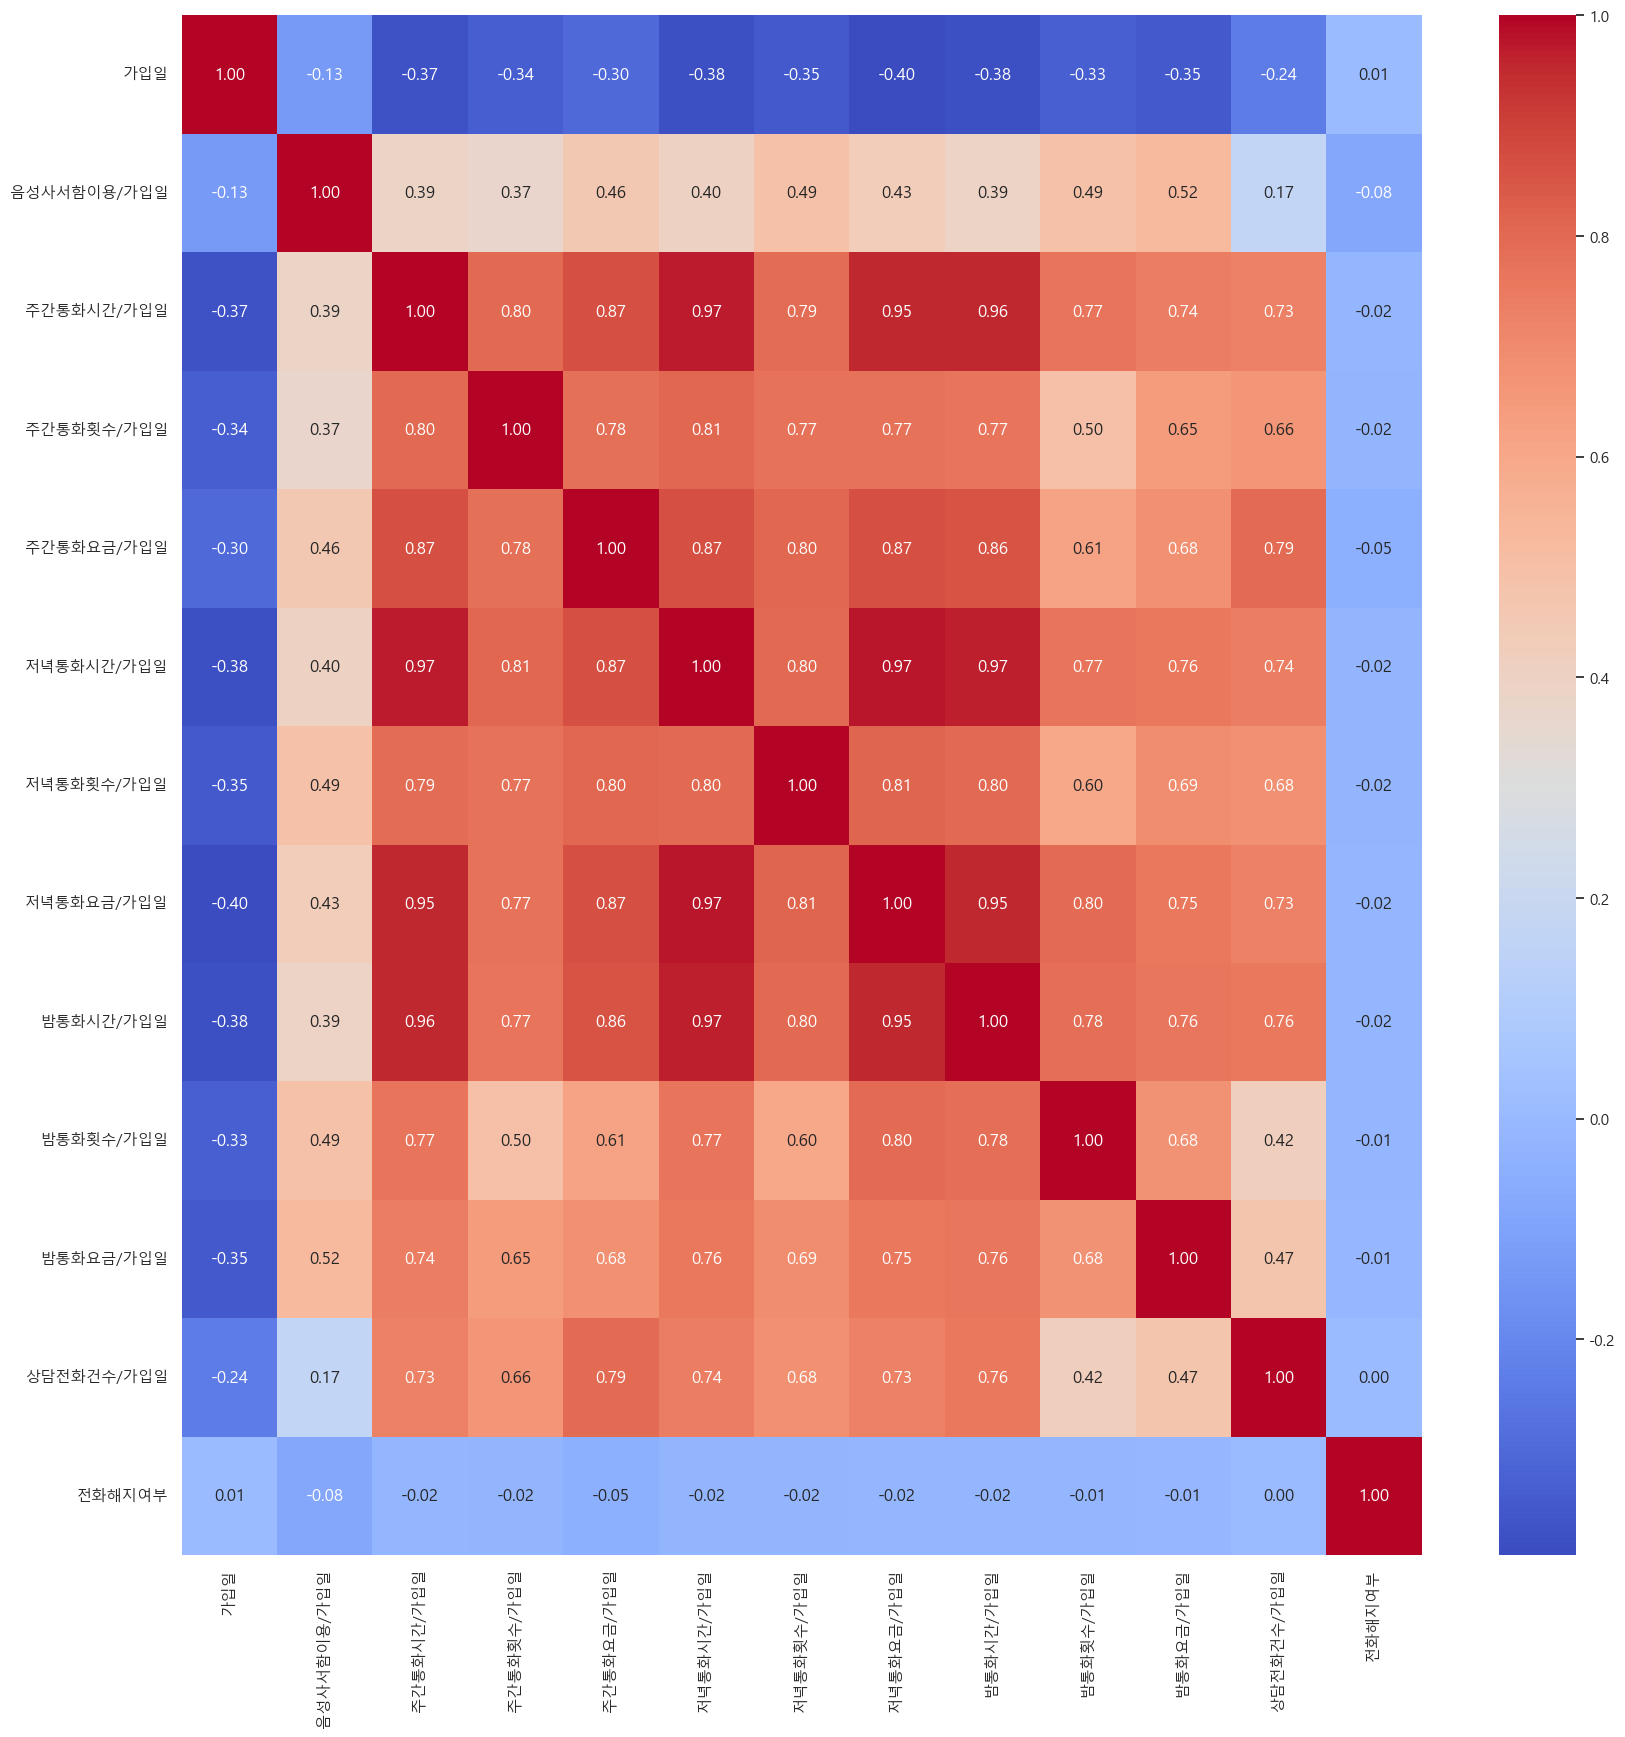

In [42]:
plt.figure(figsize=(20,20))
sns.heatmap(가입일대비.corr(), fmt=".2f", annot=True, cmap="coolwarm")

# 상담건수 비교

In [ ]:
tro[['전화해지여부','상담전화건수']].value_counts()

In [ ]:
asdf

# 제출

In [ ]:
y = df['전화해지여부']
X = df.drop('전화해지여부',  axis=1)
print(X.shape, y.shape)

In [ ]:
help(classification_report)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1111)
X_train.shape, X_test.shape, y_train.shape, y_test.shape 